In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_test = pd.read_csv("test-full.csv")
df_train = pd.read_csv("train.csv")
# pour avoir cover type au début
df_train = df_train[[df_train.columns[-1]] + list(df_train.columns[0:-1])]

In [4]:
df_train.shape, df_test.shape

((15120, 56), (581012, 55))

In [5]:
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train["Cover_Type"].value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

### Basis script

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target 
X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Creating a Test dataset
X_test = df_test

# Make predictions on the test dataset
y_pred = clf.predict(X_test)

# Saving predictions to a CSV file
predictions_df = pd.DataFrame({'Cover_Type': y_pred})

# Having it fit the desired format
Id = [i for i in range (1, 581013)]
predictions_df['Id'] = Id
# predictions_df.to_csv('test_predictions.csv', index=False) # peut-être plus simple de directement mettre index = True


In [8]:
predictions_df["Cover_Type"].value_counts()

2    236112
1    216326
3     38178
7     31667
5     28425
6     26278
4      4026
Name: Cover_Type, dtype: int64

### First train-test

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Si on met que la df en input
def RF_classif(df_train=df_train):
    
    if "Wilderness_Area_Synth" in df_train.columns:
        df_train = df_train.drop(columns="Wilderness_Area_Synth")

    
    # Separate features and target 
    X_train = df_train.drop('Cover_Type', axis=1)
    y_train = df_train['Cover_Type']

    data_train, data_test, target_train, target_test = train_test_split(
        X_train, y_train, test_size = 0.2
    )

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

# Si test & train déjà définis
def RF_classif_train_test(data_train, target_train, data_test, target_test):

    # Initialize and train a Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(data_train, target_train)

    # Make predictions on the test dataset
    y_pred = clf.predict(data_test)
    
    return target_test, y_pred

In [10]:
y_true, y_pred = RF_classif()
accuracy_score(y_true, y_pred) # bien meilleur score que sur Kags

0.8809523809523809

In [11]:
pd.DataFrame(sorted(np.stack([clf.feature_names_in_, clf.feature_importances_* 100]).T, key=lambda x: x[1], reverse=True))

,0,1
0,Elevation,20.632355
1,Id,13.322041
2,Horizontal_Distance_To_Roadways,8.330502
3,Horizontal_Distance_To_Fire_Points,6.130473
4,Horizontal_Distance_To_Hydrology,4.918169
5,Wilderness_Area4,4.871603
6,Vertical_Distance_To_Hydrology,4.423837
7,Hillshade_9am,4.357751
8,Aspect,4.033937
9,Hillshade_3pm,3.803219


In [12]:
print(classification_report(y_true, y_pred))

# On prédit moins bien 1 et 2, ce qui est un problème pcq représentent une immense majorité du dataset final

              precision    recall  f1-score   support

           1       0.82      0.80      0.81       414
           2       0.83      0.73      0.78       447
           3       0.84      0.87      0.85       432
           4       0.93      0.99      0.96       435
           5       0.90      0.95      0.92       445
           6       0.89      0.85      0.87       420
           7       0.94      0.98      0.96       431

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024



In [13]:
a = pd.DataFrame(pd.DataFrame(y_true).value_counts(), columns=["True"])
b = pd.DataFrame(pd.DataFrame(y_pred).value_counts(), columns=["Pred"])

a.loc[range(1,8)], b.loc[range(1,8)]    #### ON A TENDENCE A SOUS PREDIRE 2, pq ????

(            True
 Cover_Type      
 1            414
 2            447
 3            432
 4            435
 5            445
 6            420
 7            431,
    Pred
 0      
 1   402
 2   391
 3   446
 4   461
 5   472
 6   400
 7   452)

# Looking into the data

<Axes: >

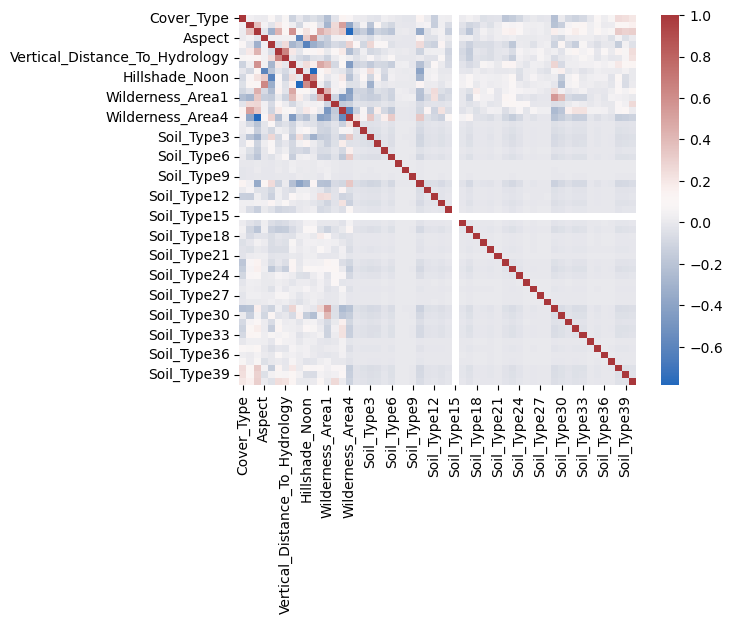

In [14]:
sns.heatmap(df_train.corr(), cmap = 'vlag') ## sans les soils sinon illisble

# Unsupervised (sans les soil types)

<Axes: >

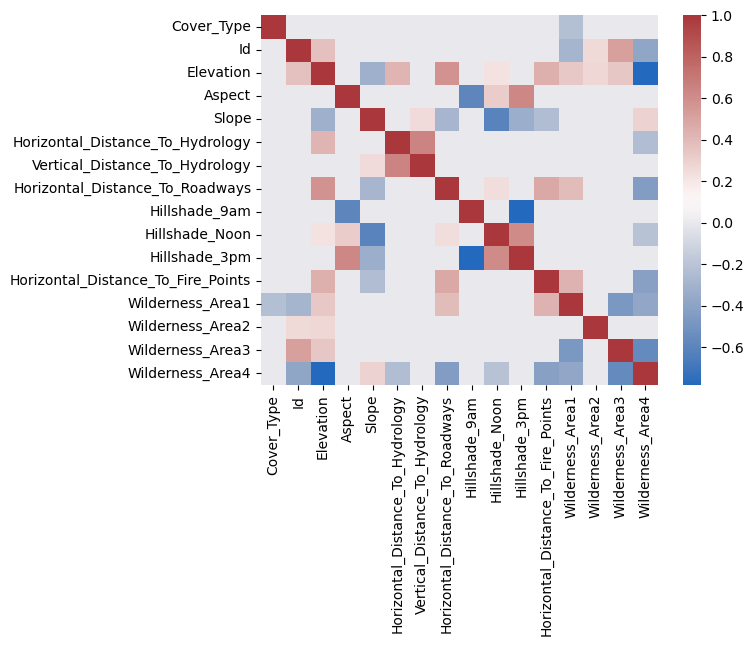

In [15]:
df_train_nosoil = df_train.iloc[:,:16]


sns.heatmap((abs(df_train_nosoil.corr()) > 0.2) * df_train_nosoil.corr(), cmap='vlag') ## sans les soils sinon illisble

### Une TSNE

In [16]:
from sklearn.manifold import TSNE

X_train_ns = df_train_nosoil.drop('Cover_Type', axis=1)
y_train_ns = df_train_nosoil['Cover_Type']

In [17]:
tsne = TSNE(verbose=True, n_components=2)
tsne_repr = tsne.fit_transform(X_train_ns)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15120 samples in 0.025s...
[t-SNE] Computed neighbors for 15120 samples in 0.301s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15120
[t-SNE] Computed conditional probabilities for sample 2000 / 15120
[t-SNE] Computed conditional probabilities for sample 3000 / 15120
[t-SNE] Computed conditional probabilities for sample 4000 / 15120
[t-SNE] Computed conditional probabilities for sample 5000 / 15120
[t-SNE] Computed conditional probabilities for sample 6000 / 15120
[t-SNE] Computed conditional probabilities for sample 7000 / 15120
[t-SNE] Computed conditional probabilities for sample 8000 / 15120
[t-SNE] Computed conditional probabilities for sample 9000 / 15120
[t-SNE] Computed conditional probabilities for sample 10000 / 15120
[t-SNE] Computed conditional probabilities for sample 11000 / 15120
[t-SNE] Computed conditional probabilities for sample 12000 / 15120
[t-SNE] Computed conditional probabilities for sam

Exception in thread Thread-7 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\User\anaconda3\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\

[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.025421
[t-SNE] KL divergence after 1000 iterations: 0.644564


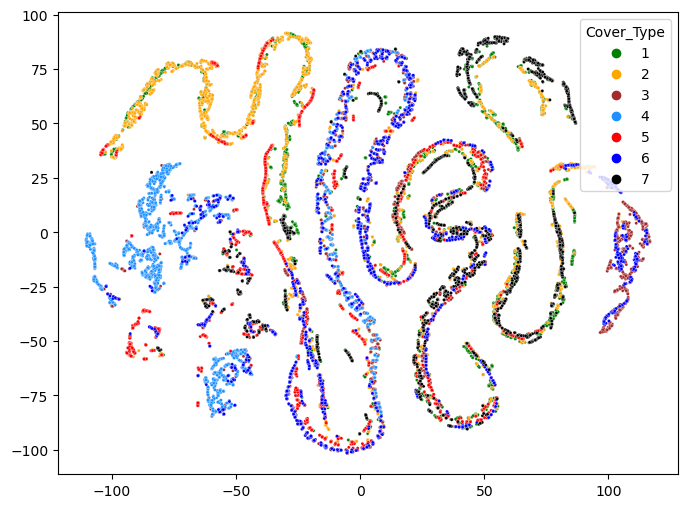

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_repr[:, 0], y=tsne_repr[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()

In [19]:
df_test_ns = df_test.iloc[:,:15]

### Une PCA

In [20]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_ns)

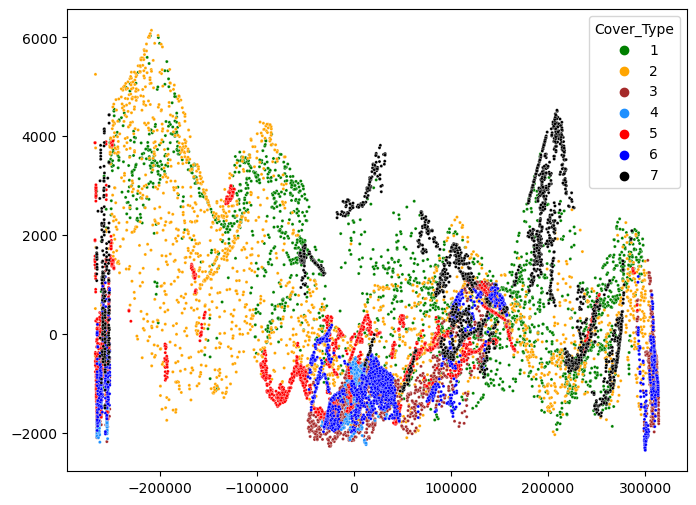

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()
# On voit que les 1 et 2 sont beaucoup plus dispersés que les autres ici, ce qui peut expliquer la difficulté à les prédire

In [22]:
pca.explained_variance_ratio_

array([9.99899594e-01, 7.27579503e-05])

In [23]:
# On voit que la projection sur une dimension explique 99.99% de la variance (??) ==> A ELUCIDER 

In [24]:
pca2 = PCA(n_components=1)
X_test_10D = pca.fit_transform(df_test)
pca.explained_variance_ratio_
# Pareil pour df_test !

array([9.99867467e-01, 8.17774791e-05])

In [25]:
pca = PCA(n_components=1)
X_1D = pca.fit_transform(X_train_ns)
df_reduced = pd.DataFrame(np.stack([y_train_ns, X_1D.ravel()]).T, columns=["Cover_Type", "1D"])

In [26]:
y_true, y_pred = RF_classif(df_reduced)
accuracy_score(y_true, y_pred) # on arrive à 67% d'accuracy avec une seule dimension !!!!!!

0.6732804232804233

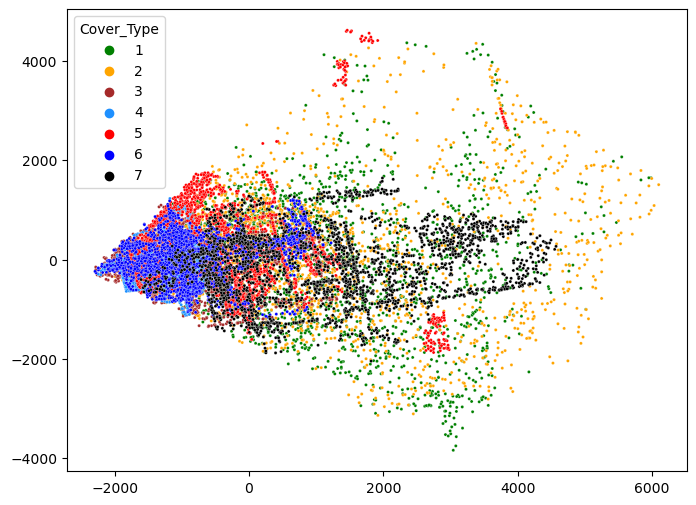

In [27]:
### Si on essaie les ID

from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_ns.drop(columns='Id'))
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2D[:, 0], y=X_2D[:, 1], hue=y_train_ns,
                palette=['green','orange','brown','dodgerblue','red', 'blue', 'black'],
                s=5)
plt.show()
# On voit que les 1 et 2 sont beaucoup plus dispersés que les autres ici, ce qui peut expliquer la difficulté à les prédire

In [28]:
pca.explained_variance_ratio_.sum() # Plus réaliste et déjà pas mal

0.948460668851141

In [29]:
df_reduced = pd.DataFrame(np.c_[y_train_ns, X_2D], columns=["Cover_Type", "1D", "2D"])
y_true, y_pred = RF_classif(df_reduced)
accuracy_score(y_true, y_pred)

0.42956349206349204

In [30]:
# bizarre parce que semble largement déterminé par la scale des features
# (expliqué à 99% pcq échelle des indices de loin supérieure mais ne change rien quand on scale - heureusement pcq pca censée déjà scaler)

### K-means

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=5, init="k-means++")
y_pred = kmeans.fit_predict(df_train_nosoil.drop(columns=["Cover_Type"]))

In [45]:
pd.Series(y_pred).value_counts()

0    6791
1    4286
2    4043
dtype: int64

In [46]:
pd.Series(kmeans.predict((df_test_ns))).value_counts()

0    229506
2    194419
1    157087
dtype: int64

In [47]:
kmeans.transform(df_test_ns.iloc[0:3])

array([[282008.23857878,  32544.46989751, 491246.89571431],
       [282006.70549159,  32541.34894524, 491245.78019775],
       [282007.28266546,  32516.15172914, 491242.57054947]])

### Best number of clusters

In [48]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_train_nosoil.drop(columns=["Cover_Type"]))
    inertias.append(kmeans.inertia_)

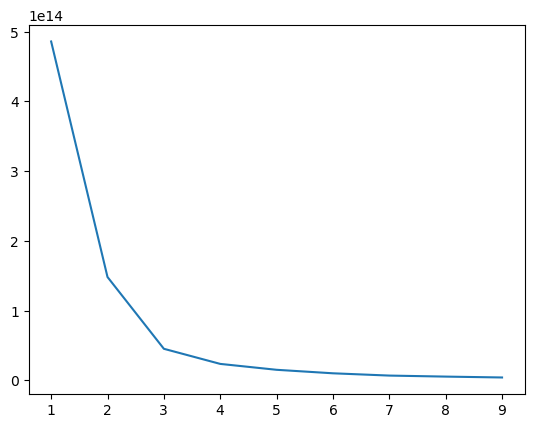

In [49]:
plt.plot(range(1, 10), inertias)

In [50]:
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_test_ns)
    inertias.append(kmeans.inertia_)

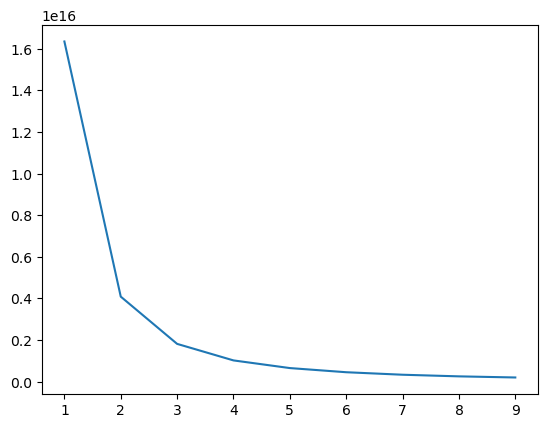

In [51]:
plt.plot(range(1,10), inertias)

In [52]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 10):
    print(i)
    kmeans = KMeans(n_clusters=i, n_init=5, init="k-means++")
    kmeans.fit(df_train_nosoil.drop(columns=["Cover_Type"]))
    ss.append(silhouette_score(df_train_nosoil.drop(columns=["Cover_Type"]), kmeans.labels_))

2
3
4
5
6
7
8
9


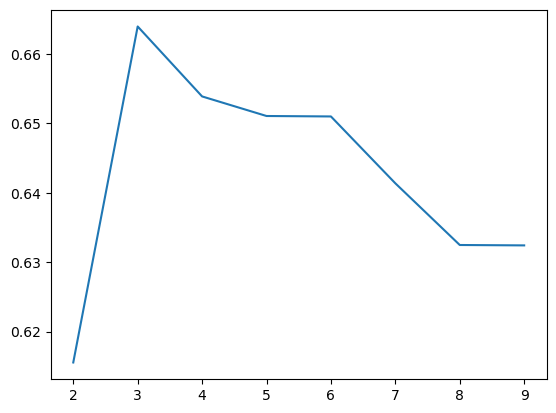

In [53]:
plt.plot(range(2, 10), ss)

2
3
4
5
6
7
8
9


C:\Users\User\AppData\Local\Temp\ipykernel_16688\1151679952.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)


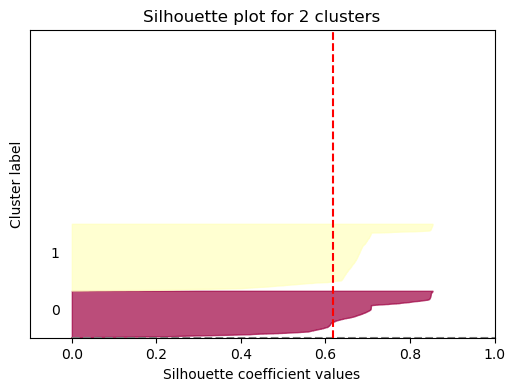

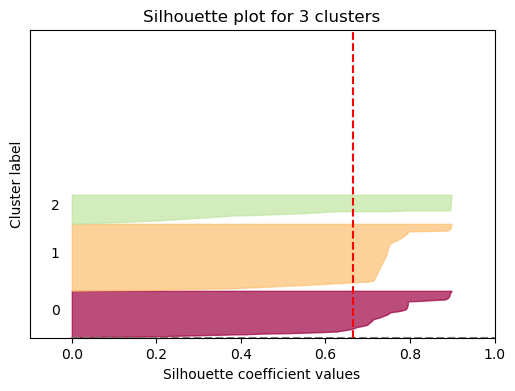

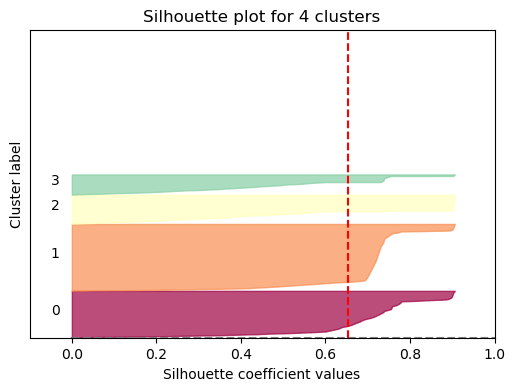

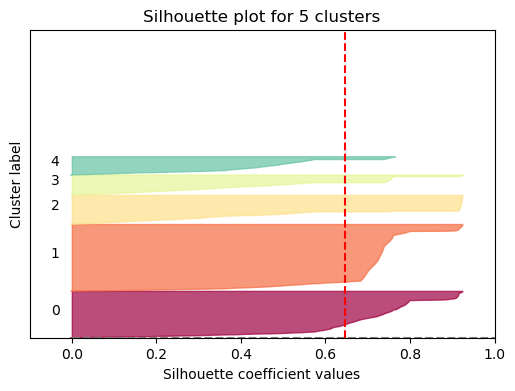

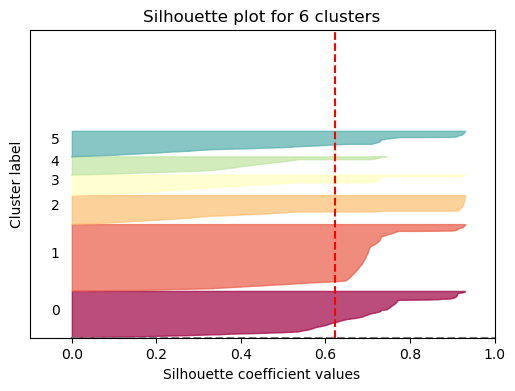

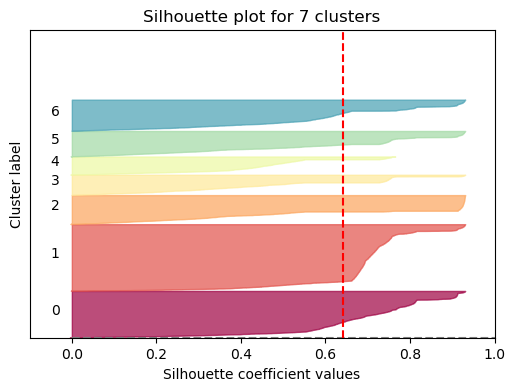

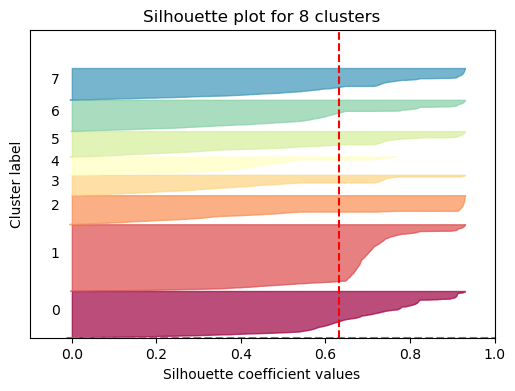

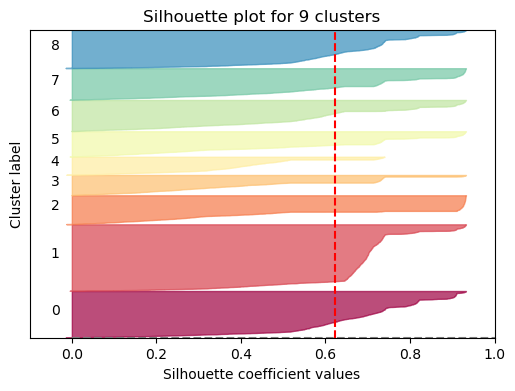

In [54]:
from sklearn.metrics import silhouette_samples

X = df_train_nosoil.drop(columns=["Cover_Type"])
range_n_clusters = range(2, 10)
silhouette_scores = []
sample_silhouette_values = []

for n_clusters in range_n_clusters:
    # Initialize and fit KMeans clustering algorithm
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Compute the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette values for each sample
    sample_silhouette_values.append(silhouette_samples(X, cluster_labels))

for i, n_clusters in enumerate(range_n_clusters):
    plt.figure(figsize=(6, 4))
    plt.plot([0, 1], [i, i], '--', color='gray')  # Plot silhouette score reference line
    plt.yticks([])  # Clear the y-axis labels
    plt.xlim([-0.1, 1])  # Set the x-axis limits
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])  # Set the y-axis limits
    
    silhouette_values = sample_silhouette_values[i]
    silhouette_values.sort()
    
    y_lower = 10
    for j in range(n_clusters):
        cluster_silhouette_values = silhouette_values[cluster_labels == j]
        cluster_silhouette_values.sort()
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.get_cmap("Spectral")(float(j) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10
    
    plt.title("Silhouette plot for {} clusters".format(n_clusters))
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")  # Plot average silhouette score
    plt.show()

### Same clusters if we do it on test or train?

In [86]:
km_train = KMeans(n_clusters=3, n_init=10, init="k-means++")
km_train.fit_predict(df_train_nosoil.drop(columns=["Cover_Type"]))
c1 = km_train.cluster_centers_

km_test = KMeans(n_clusters=3, n_init=10, init="k-means++")
km_test.fit_predict(df_test_ns)
c2 =km_test.cluster_centers_

In [87]:
norms = np.zeros((3, 3))

for i in range(3):
    for j in range(3):
        norms[i, j] = np.linalg.norm(c1[i] - c2[j])
        
norms / 1000

#### Seems to be giving relatively similar results

array([[199.95960658, 393.97783098,   6.49740399],
       [258.85779618,  64.86848027, 452.32069628],
       [  9.2291277 , 184.81286471, 202.68247323]])

In [91]:
# If we do it on the full ds, what's the labels distribution on train
# On dirait que clusterise bien pareil même si on entraine 
pd.Series(km_test.predict(df_train_nosoil.drop(columns=["Cover_Type"]))).value_counts()

0    6375
1    4738
2    4007
dtype: int64

In [94]:
df_test["kmean_cluster"] = km_test.labels_
df_train["kmean_cluster"] = km_test.predict(df_train_nosoil.drop(columns=["Cover_Type"]))

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

X_train = df_train.drop('Cover_Type', axis=1)
y_train = df_train['Cover_Type']

data_train, data_test, target_train, target_test = train_test_split(
    X_train, y_train, test_size = 0.2)

cat_col = ["kmean_cluster"]
cols = df_train.drop(columns=["Cover_Type", 'kmean_cluster']).columns

preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_col),
        ("others", "passthrough", cols),
    ])

clf = RandomForestClassifier(n_estimators=100, random_state=42)
pipe = make_pipeline(preprocessor, clf)

pipe.fit(data_train, target_train)

y_pred = pipe.predict(data_test)

In [112]:
print(classification_report(y_pred, target_test))

              precision    recall  f1-score   support

           1       0.82      0.84      0.83       407
           2       0.76      0.82      0.79       380
           3       0.86      0.86      0.86       428
           4       0.97      0.93      0.95       471
           5       0.95      0.90      0.93       461
           6       0.87      0.88      0.88       424
           7       0.96      0.96      0.96       453

    accuracy                           0.89      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.89      0.89      0.89      3024

